# **Naive Bayes**

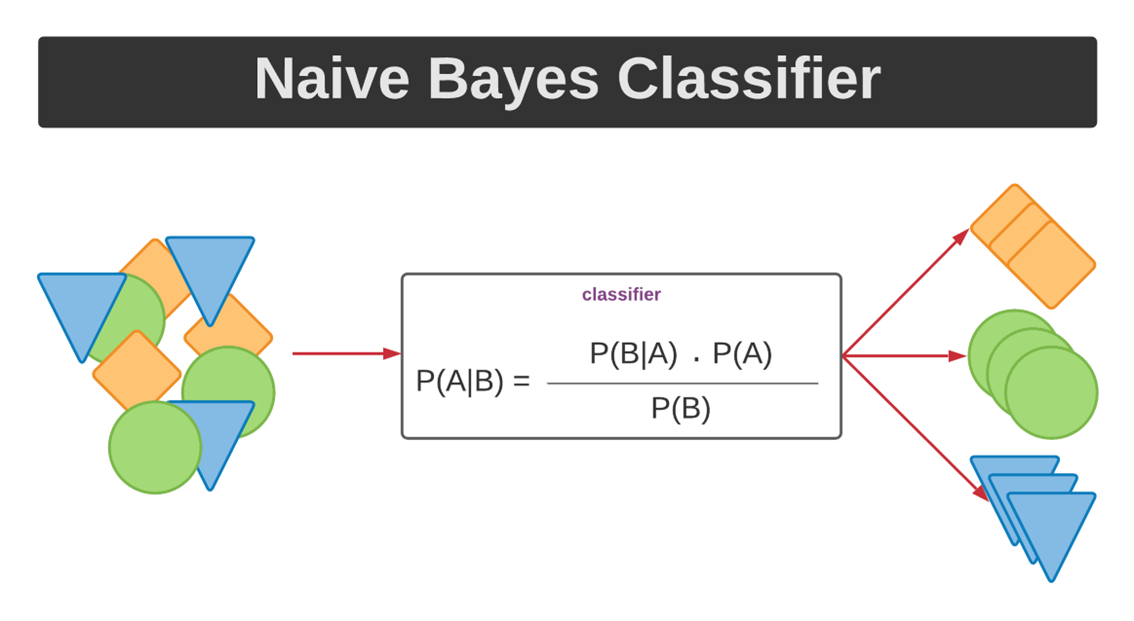

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
clf = MultinomialNB()
clf2 = CategoricalNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("GaussianNB Number of mislabeled points out of a total %d points : %d, and the Accuracy is %f"
      % (
          X_test.shape[0], (y_test != y_pred).sum(),
         ((y_test == y_pred).sum()/X_test.shape[0])
         )
      )

y_pred = clf.fit(X_train, y_train).predict(X_test)
print("MultinomialNB Number of mislabeled points out of a total %d points : %d, and the Accuracy is %f"
      % (
          X_test.shape[0], (y_test != y_pred).sum(),
         ((y_test == y_pred).sum()/X_test.shape[0])
         )
      )

y_pred = clf2.fit(X_train, y_train).predict(X_test)
print("CategoricalNB Number of mislabeled points out of a total %d points : %d, and the Accuracy is %f"
      % (
          X_test.shape[0],
          (y_test != y_pred).sum(),
         ((y_test == y_pred).sum()/X_test.shape[0])
         )
      )

GaussianNB Number of mislabeled points out of a total 75 points : 4, and the Accuracy is 0.946667
MultinomialNB Number of mislabeled points out of a total 75 points : 30, and the Accuracy is 0.600000
CategoricalNB Number of mislabeled points out of a total 75 points : 7, and the Accuracy is 0.906667


In [11]:
a=6
b=9.0

print("a = %d and b = %f"%(a,b))

a = 6 and b = 9.000000


In [12]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
print(iris.data[:10])

y_pred = clf.fit(X_train, y_train).predict(X_test)
print("tree Number of mislabeled points out of a total %d points : %d, and the Accuracy is %f"
      % (
          X_test.shape[0],
          (y_test != y_pred).sum(),
         ((y_test == y_pred).sum()/X_test.shape[0])
         )
      )

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
tree Number of mislabeled points out of a total 75 points : 3, and the Accuracy is 0.960000


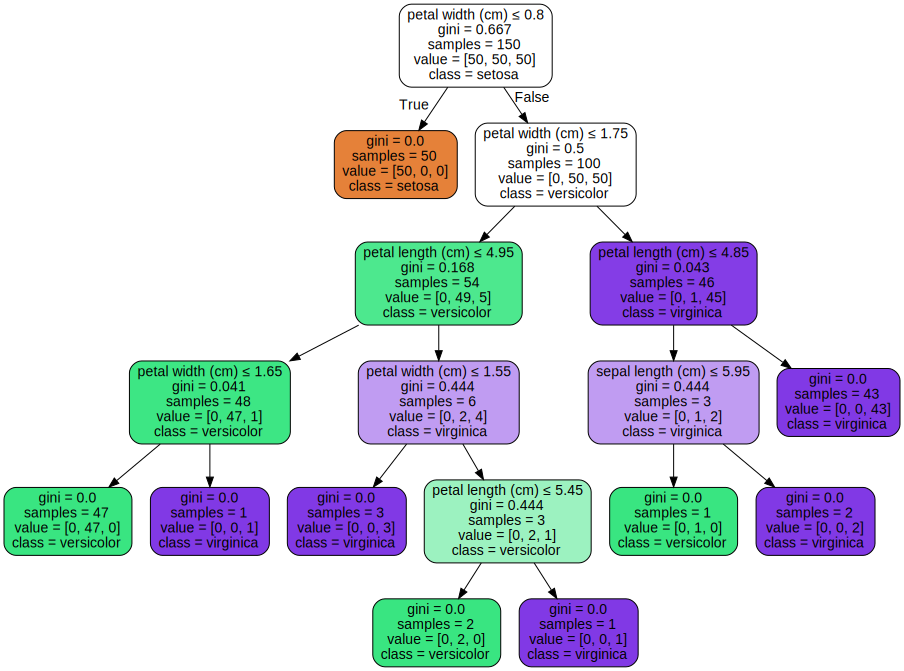

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# **Random Forest**
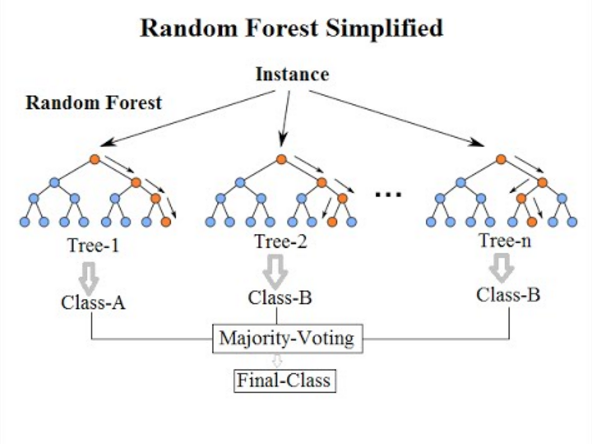

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0) # add parameter 
clf.fit(X, y)
 # print Accuracy  
print(clf.predict([[0, 0, 0, 0]]))

[1]


# **Feature importances with a forest of trees¶**


In [ ]:
import matplotlib.pyplot as plt

# **Data generation and model fitting**¶
We generate a synthetic dataset with only 3 informative features. We will explicitly not shuffle the dataset to ensure that the informative features will correspond to the three first columns of X. In addition, we will split our dataset into training and testing subsets.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.042 seconds


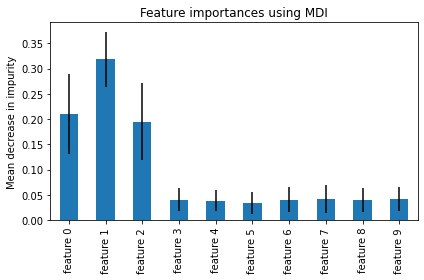

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# **SVM**


In [15]:
# Importing required libraries
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

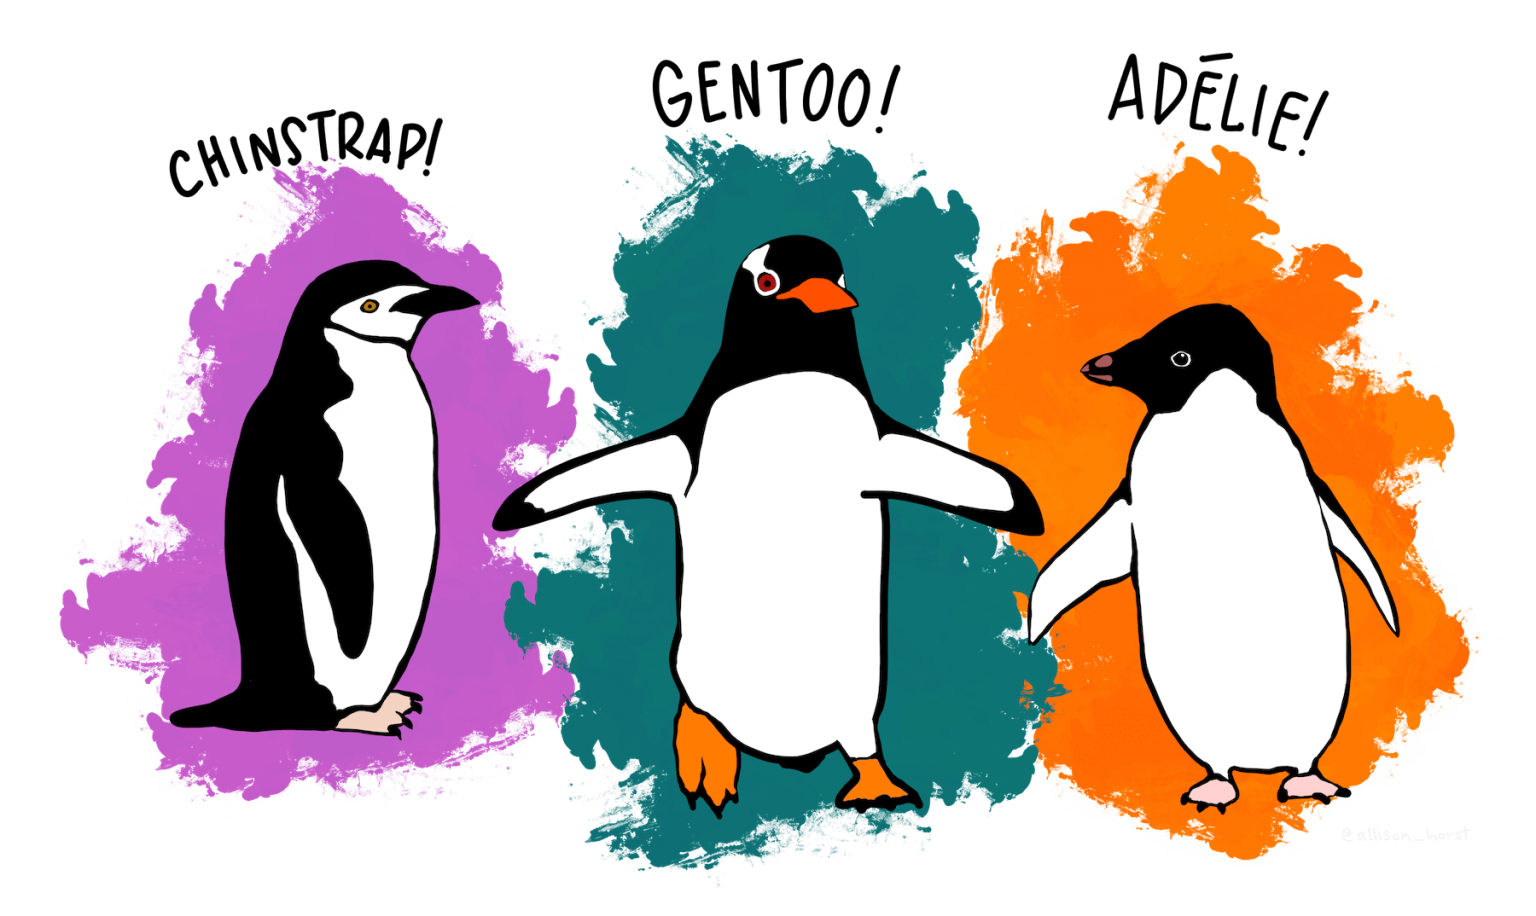

In [16]:
df = load_dataset('penguins')
print(df.head())
print(len(df))

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
344


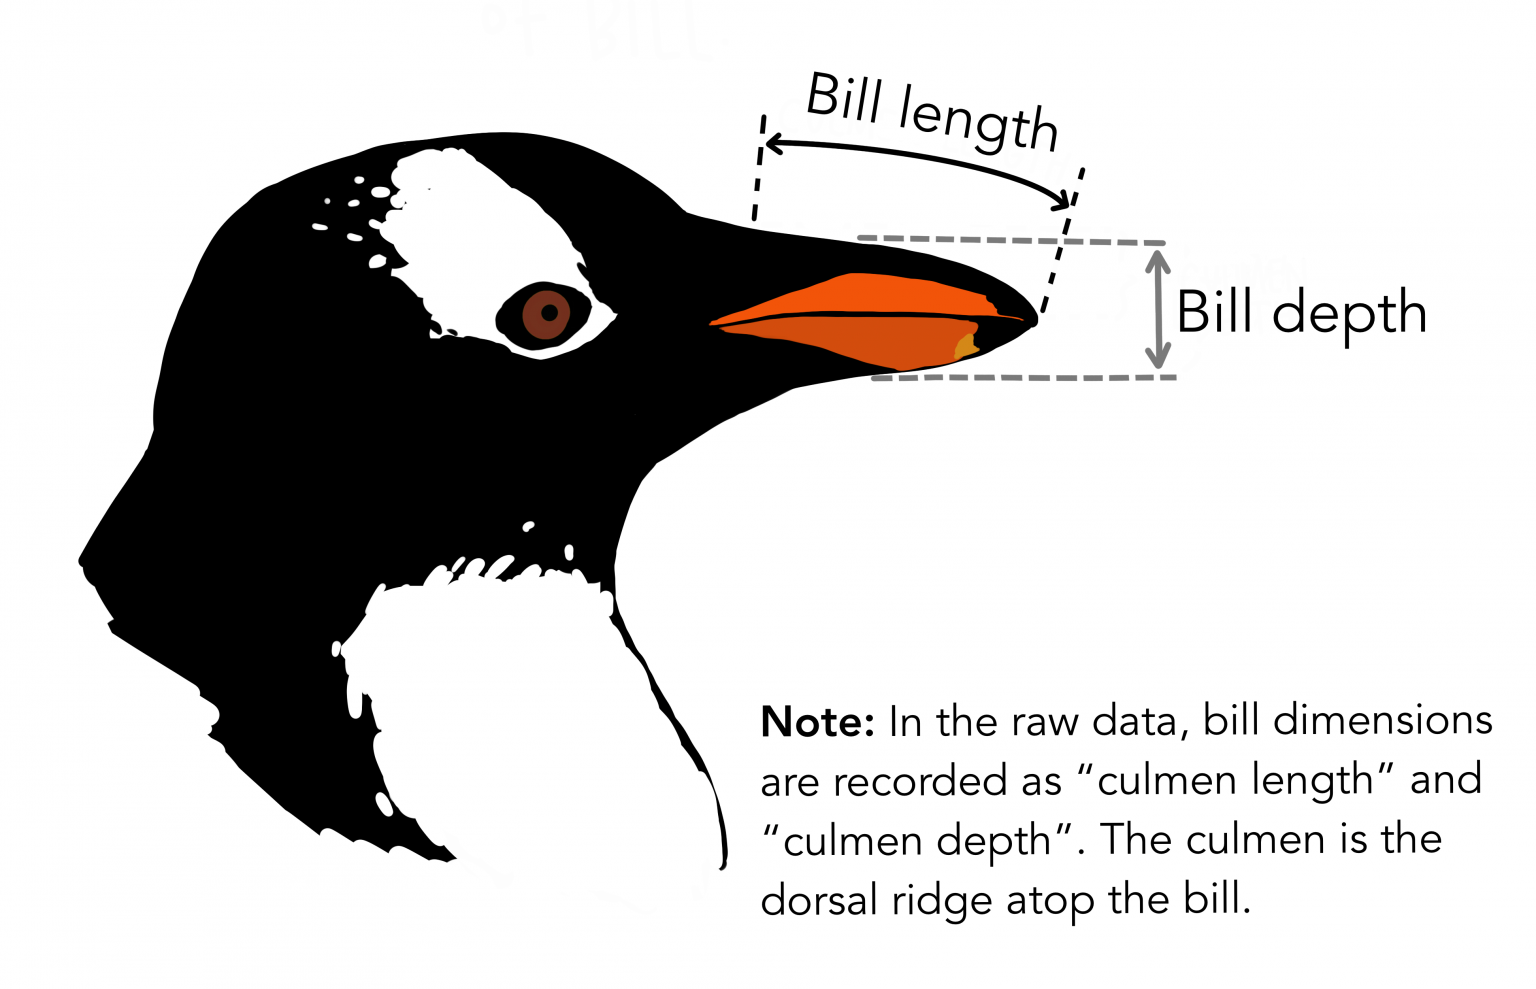

In [ ]:
# Dropping missing records
df = df.dropna()
print(len(df))

333


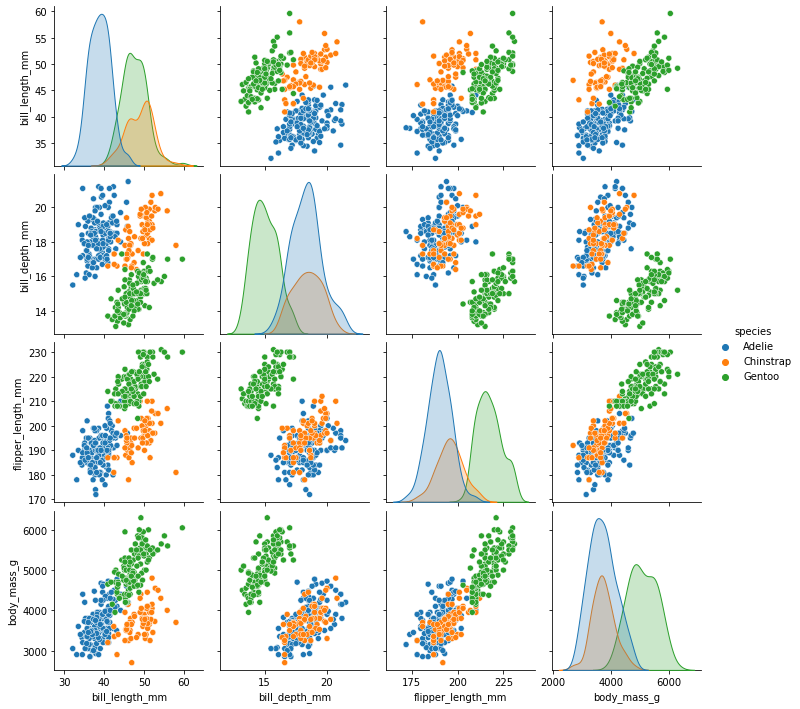

In [ ]:
pairplot(df, hue='species')
plt.show()

#**bold text** Splitting our Data into Testing and Training Data


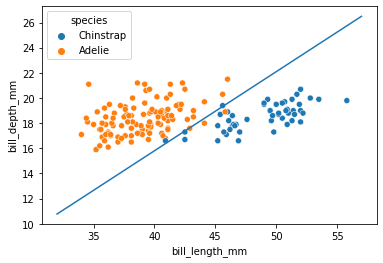



 pridiction accuracy is 0.981481


In [40]:
df = load_dataset('penguins')
df = df.dropna()
df = df[df['species'] != 'Gentoo']    # This limits us to two classes

# X = df.select_dtypes('number')
X = df[['bill_length_mm', 'bill_depth_mm']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)



clf = SVC(kernel='linear',C=2)



clf.fit(X_train, y_train)

# Visualizing the linear function for our SVM classifier
import numpy as np
from seaborn import scatterplot
w = clf.coef_[0]
b = clf.intercept_[0]
x_visual = np.linspace(32,57)
y_visual = -(w[0] / w[1]) * x_visual - b / w[1]

scatterplot(data = X_train, x='bill_length_mm', y='bill_depth_mm', hue=y_train)
plt.plot(x_visual, y_visual)
plt.show()
predictions = clf.predict(X_test)
print("\n\n pridiction accuracy is %f"%(accuracy_score(y_test, predictions)))

The tol parameter is a setting for the SVM's tolerance in optimization. Recall that yi(xi.w+b)-1 >= 0. For an SVM to be valid, all values must be greater than or equal to 0, and at least one value on each side needs to be "equal" to 0, which will be your support vectors. Since it is highly unlikely that you will actually get values equal perfectly to 0, you set tolerance to allow a bit of wiggle room. The default tol with Scikit-Learn's SVM is 1e-3, which is 0.001